# DSC540 Project ML

#### Student: Serena Yang, Zhiqi Shao, Xuan Wei

DePaul University  
Professor: Ilyas Ustun, PhD  
Chicago, IL  

## Instructions
- Decide on solving a problem and find an appropriate data set.
- Write clearly the source of the data. Provide the link at the top. 
- Apply data cleaning, data preparation, visualization, etc.
- Apply several of the machine learning models we have learned in class. Please, if possible, try to apply some models from outside the class.
- Conclude with the best model and its predictions. What are your findings? If you had more time what do you think can be done further to improve the results?
- Provide some writing and explanations throughout your notebook.
- The size of the project should be similar to what we have done in the class projects.
- The project can be done individually or in groups. In either case, write your name(s) at the very top.
- If working as a group, only one student should submit the project files.
- Submit your files under Submission -> Project ML

## Deliverables:

    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML       

> Do not ZIP the files.

### Problem
Predict student performance in secondary education (high school).

### Source

**Student Performance Data Set**

**[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)**

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

-



### Packages

In [1]:
#Packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preparation

In [6]:
# import data

# using google colab
from google.colab import drive
drive.mount('/content/drive')
dfMat = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project ML/student-mat.csv',sep=";")
dfPor = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project ML/student-por.csv',sep=";")

#using Jupyter notebook
# dfMat = pd.read_csv('student-mat.csv',sep=";")
# dfPor = pd.read_csv('student-por.csv',sep=";")
df = pd.concat([dfMat,dfPor])
#df = dfMat

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [8]:
# dataset has 1044 rows and 33 columns
df.shape

(1044, 33)

In [9]:
# dataset doesn't have missing values
df.isnull().values.any()

False

In [10]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C' 
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,B


## Data Visualization

### Student Grade Distribution


Text(0, 0.5, 'Number of Students')

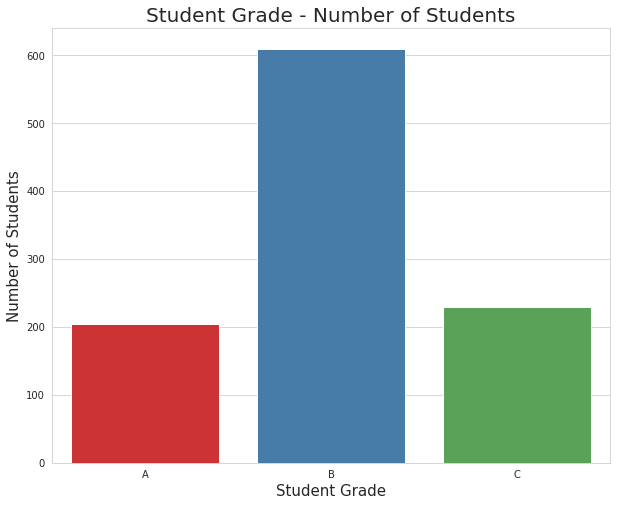

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df.grade, order=["A","B","C"], palette='Set1')
plt.title('Student Grade - Number of Students',fontsize=20)
plt.xlabel('Student Grade', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)

### Student Age Distribution


Text(0, 0.5, 'Number of Students')

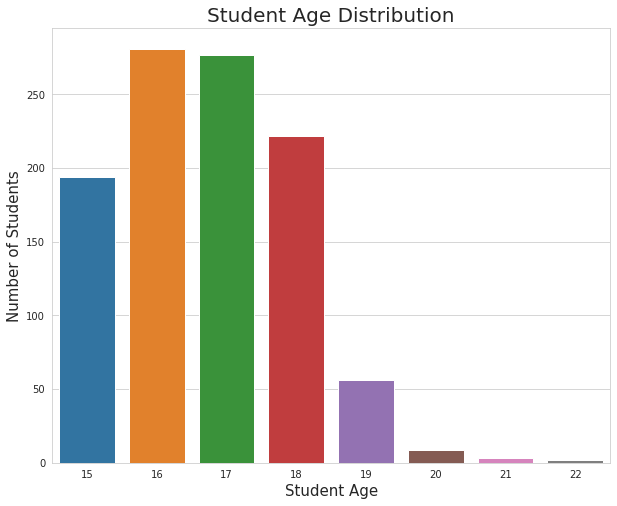

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df.age)
plt.title('Student Age Distribution',fontsize=20)
plt.xlabel('Student Age', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

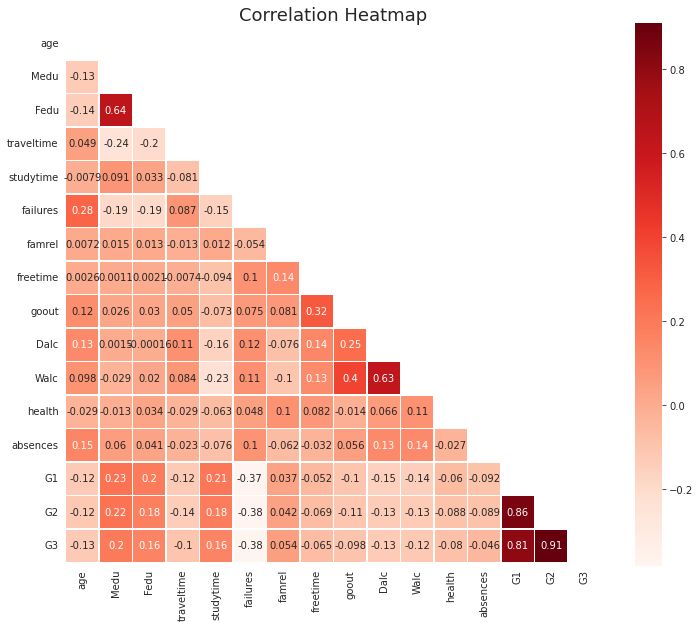

In [14]:
corr = df.corr()
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap="Reds", linewidths=.5, square=True)
plt.title('Correlation Heatmap', fontsize=18)

### Student Free Time After school level Distribution


<Figure size 432x288 with 0 Axes>

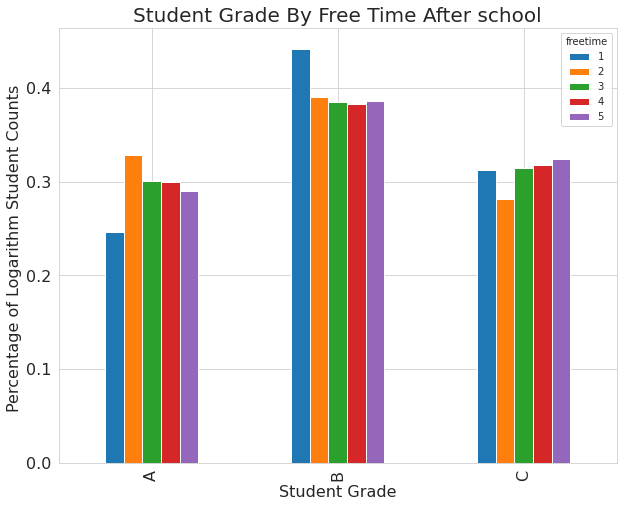

In [15]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.freetime)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(10,8))
plt.title('Student Grade By Free Time After school', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

### Student Grade By Romantic Status

<Figure size 432x288 with 0 Axes>

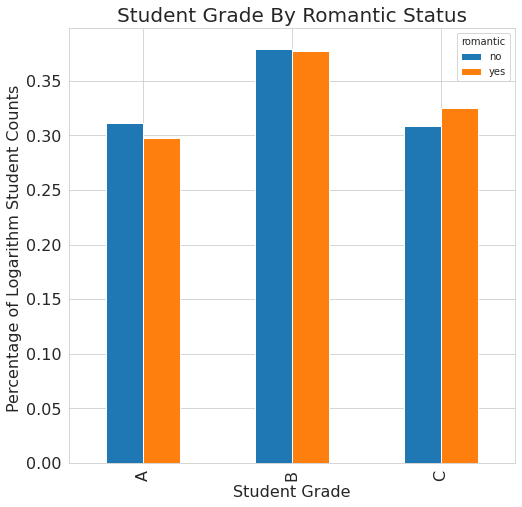

In [16]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Student Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

The Final Grade By Romantic Status plot shows that romantic status has a correlation with student grade, lesser the romantic status, better the student grade.

### Student Grade By Alcohol Consumption

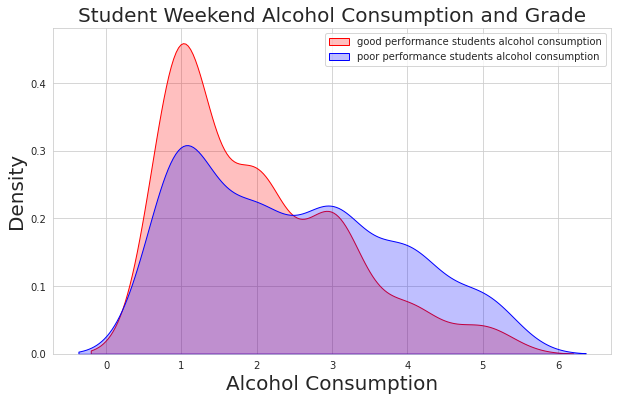

In [17]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.grade, columns=df.Walc)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

# create good student dataframe
good = df.loc[df.grade == 'A'].copy()
good = good[~good.index.duplicated()]
# good[good.index.duplicated()]

poor = df.loc[df.grade == 'C'].copy()
poor = poor[~poor.index.duplicated()]
# poor[poor.index.duplicated()]

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['Walc'], shade=True, color="r")
p1=sns.kdeplot(poor['Walc'], shade=True, color="b")
plt.title('Student Weekend Alcohol Consumption and Grade', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xlabel('Alcohol Consumption', fontsize=20)
plt.gca().legend(('good performance students alcohol consumption','poor performance students alcohol consumption'))

Weekend alcohol consumption affects grade very much.

### Student Grade By Parents Education Level

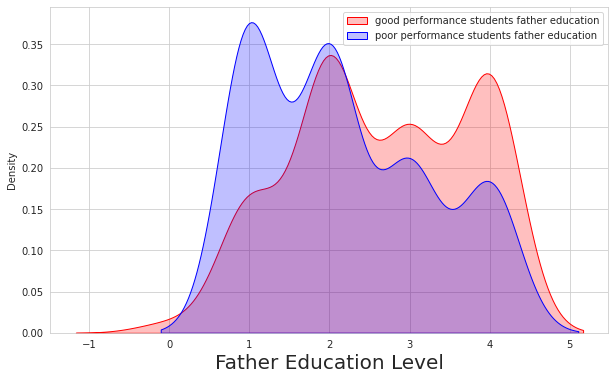

In [18]:
plt.figure(figsize=(10,6))
p2=sns.kdeplot(good['Fedu'], shade=True, color="r")
p2=sns.kdeplot(poor['Fedu'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)
plt.gca().legend(('good performance students father education','poor performance students father education'))

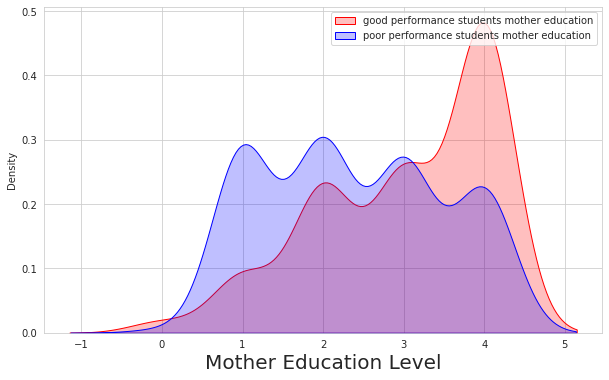

In [19]:
plt.figure(figsize=(10,6))
p2=sns.kdeplot(good['Medu'], shade=True, color="r")
p2=sns.kdeplot(poor['Medu'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)
plt.gca().legend(('good performance students mother education','poor performance students mother education'))

<Figure size 432x288 with 0 Axes>

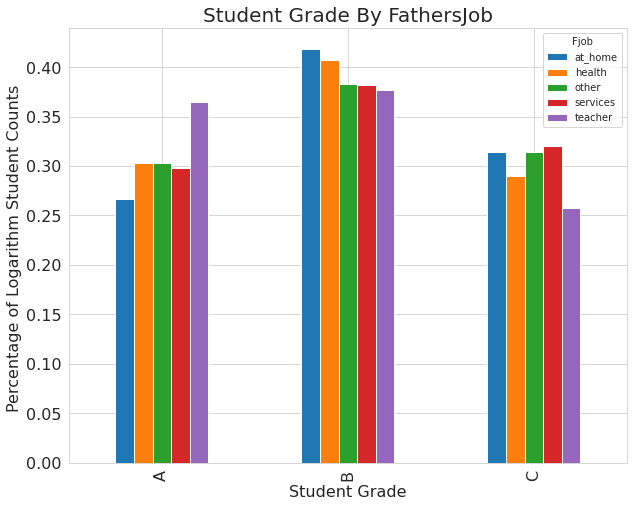

In [20]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.Fjob)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(10,8))
plt.title('Student Grade By FathersJob', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

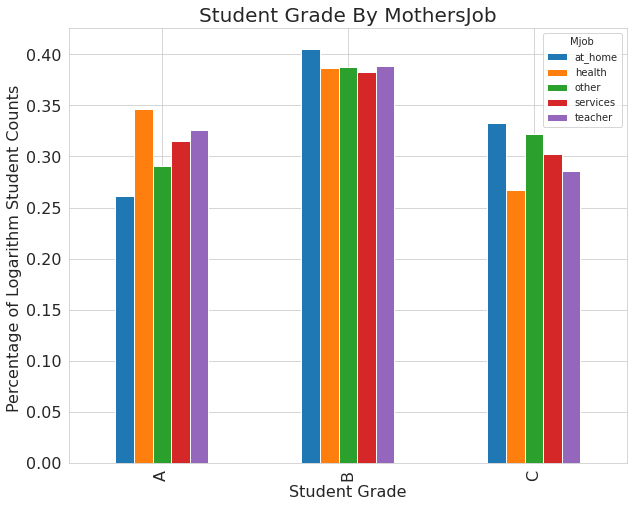

In [21]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.Mjob)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(10,8))
plt.title('Student Grade By MothersJob', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

- Mothers' eduction level has a much better influence on kids performance.
- For those students who got an A, the job category of their fathers most is the teacher.
- For those students who got an A, their mothers' job category is most in the health field.

### Student Grade By Living Area

Text(0.5, 0, 'Student Grade')

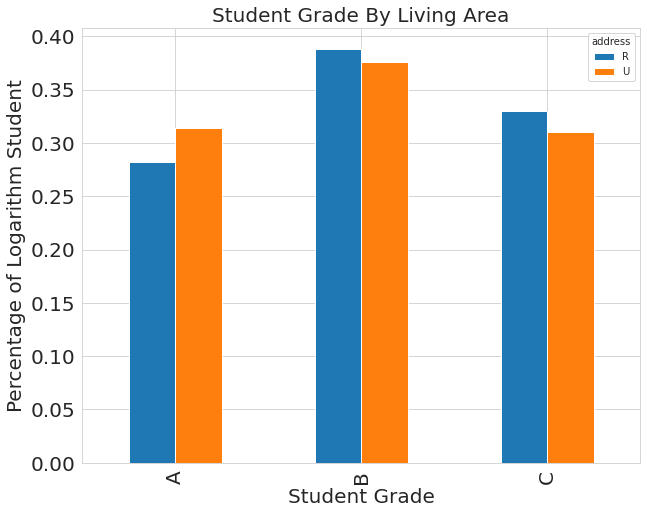

In [22]:
ad_tab1 = pd.crosstab(index=df.grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

ad_perc.plot.bar(fontsize=20, figsize=(10,8))
plt.title('Student Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student', fontsize=20)
plt.xlabel('Student Grade', fontsize=20)

Students live in the city have better performance

## Data Classification Models

In [23]:
# Prepare data
dfc = df.copy()
dfc = dfc.drop(['G3'], axis=1)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfc['grade'] = le.fit_transform(df.grade)

In [25]:
# train_test_split
from sklearn.model_selection import train_test_split
y = dfc.grade
X = dfc.drop(['grade'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [26]:
X_train.shape

(783, 58)

### Decision Tree

In [28]:
def fit_predict_score(name, clf):
    # Fit the model
    clf.fit(X_train,y_train)
    # Make predictions
    predictions = clf.predict(X_test)
    
    confusion_matrix = pd.crosstab(index=np.ravel(y_test), columns=predictions.ravel(), rownames=['Expected'], colnames=['predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predictions),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    dt_met = metrics.classification_report(y_true = y_test, y_pred = predictions,  output_dict=True)
    
    # Calculate accuracy score. What are the training and testing accuracies of the model?
    print(classification_report(y_test, predictions))
    print("\nSummary:")
    print("Recall/Sensitivity: %f"%(dt_met['1']['recall']))
    print("Specificity: %f"%(dt_met['0']['recall']))
    print("Precision: %f"%(dt_met['1']['precision']))
    print("Balanced Accuracy: %f"%(balanced_accuracy_score(y_test, predictions)))
    print("F1-score: %f"%(dt_met['1']['f1-score']))

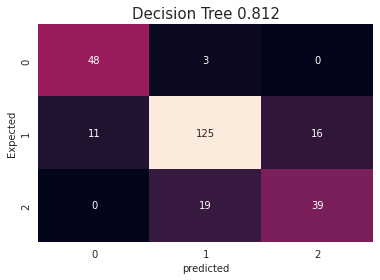

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        51
           1       0.85      0.82      0.84       152
           2       0.71      0.67      0.69        58

    accuracy                           0.81       261
   macro avg       0.79      0.81      0.80       261
weighted avg       0.81      0.81      0.81       261


Summary:
Recall/Sensitivity: 0.822368
Specificity: 0.941176
Precision: 0.850340
Balanced Accuracy: 0.811986
F1-score: 0.836120


In [30]:
from sklearn.tree import DecisionTreeClassifier
# Initiate the Decision Tree classifier
dtc=DecisionTreeClassifier()
fit_predict_score('Decision Tree',dtc)

In [31]:
print("Decisioin Tree Model Score" , ":" , dtc.score(X_train, y_train))
print("Decisioin Tree Cross Validation Score" ,":" , dtc.score(X_test, y_test))

Decisioin Tree Model Score : 1.0
Decisioin Tree Cross Validation Score : 0.8122605363984674


In [32]:
from sklearn.model_selection import GridSearchCV
min_list = [10, 50, 100, 200, 300, 500]
max_list = [2, 3, 4]
params = {'min_samples_split': min_list,'max_depth': max_list, 'random_state': [42]}

dtc = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dtc, param_grid=params, cv=5, scoring="balanced_accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'random_state': [42]},
             scoring='balanced_accuracy')

In [33]:
grid.best_params_

{'max_depth': 3, 'min_samples_split': 200, 'random_state': 42}

In [34]:
#Plot the decision tree of the best model
dtc = DecisionTreeClassifier(max_depth = 3, min_samples_split = 200, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=200, random_state=42)

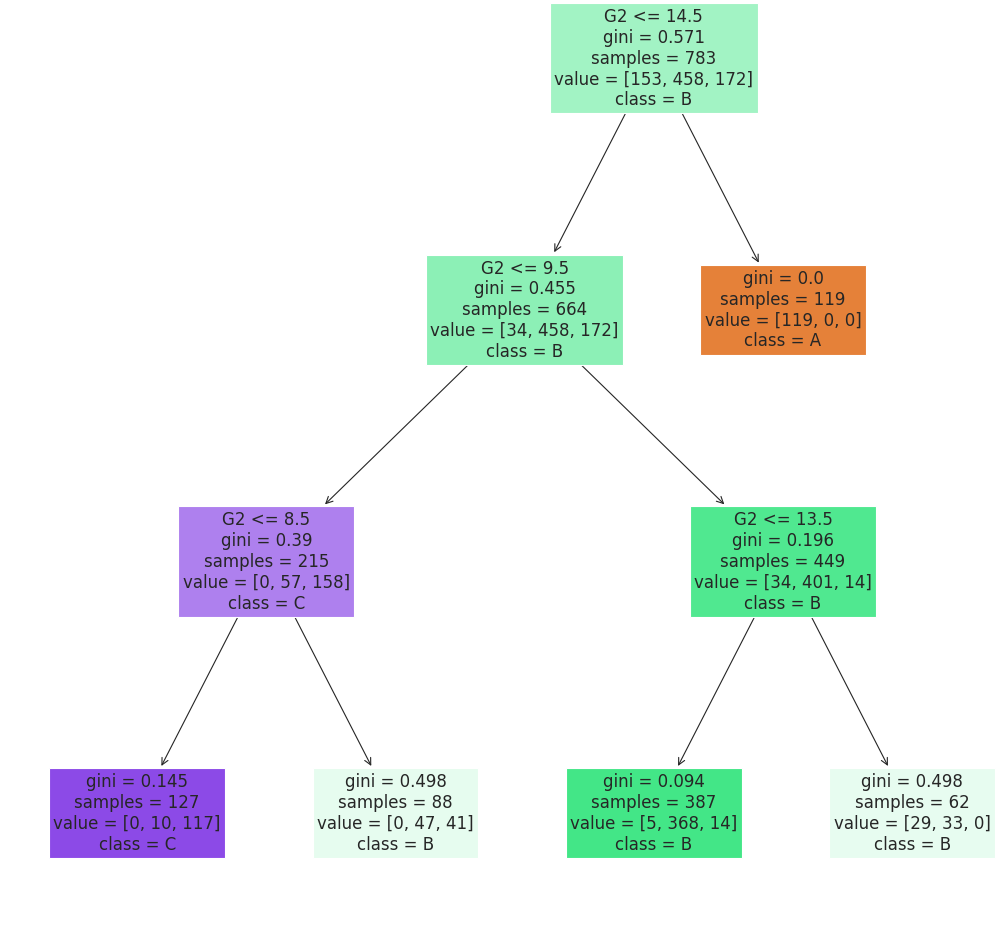

In [40]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=80)
tree.plot_tree(dtc,feature_names = X_train.columns, class_names=['A','B','C'], filled = True, fontsize=15);

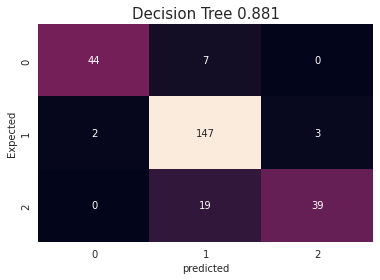

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        51
           1       0.85      0.97      0.90       152
           2       0.93      0.67      0.78        58

    accuracy                           0.88       261
   macro avg       0.91      0.83      0.86       261
weighted avg       0.89      0.88      0.88       261


Summary:
Recall/Sensitivity: 0.967105
Specificity: 0.862745
Precision: 0.849711
Balanced Accuracy: 0.834088
F1-score: 0.904615


In [41]:
fit_predict_score('Decision Tree',dtc)

In [42]:
#get the final best result by using decision tree.
print("Decisioin Tree Model Score" , ":" , dtc.score(X_train, y_train))
print("Decisioin Tree Cross Validation Score" ,":" , dtc.score(X_test, y_test))

Decisioin Tree Model Score : 0.8735632183908046
Decisioin Tree Cross Validation Score : 0.8812260536398467


- Before find the best model, the Cross Validation Score of decision tree is 0.8160919540229885.
- The final Cross Validation Score for the best decision tree model is 0.8812260536398467

### Random Forest

In [43]:
def fit_predict_score(name, clf):
    # Fit the model
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_test)
    
    confusion_matrix = pd.crosstab(index=np.ravel(y_test), columns=predictions.ravel(), rownames=['Expected'], colnames=['predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predictions),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    dt_met = metrics.classification_report(y_true = y_test, y_pred = predictions,  output_dict=True)
    
    # Create confusion matrix
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test, predictions))
    print("\nSummary:")
    print("Recall/Sensitivity: %f"%(dt_met['1']['recall']))
    print("Specificity: %f"%(dt_met['0']['recall']))
    print("Precision: %f"%(dt_met['1']['precision']))
    print("Balanced Accuracy: %f"%(balanced_accuracy_score(y_test, predictions)))
    print("F1-score: %f"%(dt_met['1']['f1-score']))

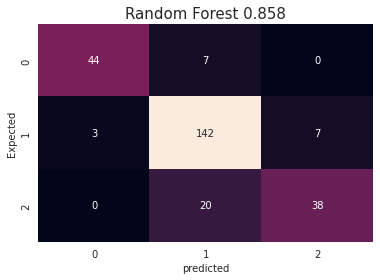

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        51
           1       0.84      0.93      0.88       152
           2       0.84      0.66      0.74        58

    accuracy                           0.86       261
   macro avg       0.87      0.82      0.84       261
weighted avg       0.86      0.86      0.85       261


Summary:
Recall/Sensitivity: 0.934211
Specificity: 0.862745
Precision: 0.840237
Balanced Accuracy: 0.817376
F1-score: 0.884735


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
fit_predict_score('Random Forest',rfc)

In [45]:
print("Random Forest Model Score" , ":" , rfc.score(X_train, y_train))
print("Random Forest Cross Validation Score" ,":" , rfc.score(X_test, y_test))

Random Forest Model Score : 1.0
Random Forest Cross Validation Score : 0.8582375478927203


In [46]:
#Perform grid search where you check for combinations of these hyper-parameters.
params = {'n_estimators': [10, 50, 100, 200, 300, 400],'min_samples_split': [10, 50, 100, 200, 300, 500],
         'max_depth': [2, 5, 10, 15, 20, 30], 'random_state': [42]}

rfc = RandomForestClassifier()
grid = GridSearchCV(estimator=rfc, param_grid=params, verbose=1, cv=5,scoring="balanced_accuracy", n_jobs=-1)

In [48]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [49]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,
                       random_state=42)

In [50]:
rfc = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,
                       random_state=42)

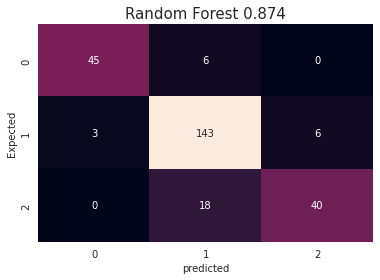

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.86      0.94      0.90       152
           2       0.87      0.69      0.77        58

    accuracy                           0.87       261
   macro avg       0.89      0.84      0.86       261
weighted avg       0.88      0.87      0.87       261


Summary:
Recall/Sensitivity: 0.940789
Specificity: 0.882353
Precision: 0.856287
Balanced Accuracy: 0.837599
F1-score: 0.896552


In [51]:
fit_predict_score('Random Forest',rfc)  

In [52]:
print("Random Forest Model Score" , ":" , rfc.score(X_train, y_train))
print("Random Forest Cross Validation Score" ,":" , rfc.score(X_test, y_test))

Random Forest Model Score : 0.9489144316730523
Random Forest Cross Validation Score : 0.8735632183908046


- Before find the best model, the Cross Validation Score of random forest is 0.8659003831417624.
- The final Cross Validation Score for the best random forest model is 0.8735632183908046

### Adaboost model

In [53]:
def fit_predict_score(name, clf):
    # Fit the model
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_test)
    
    confusion_matrix = pd.crosstab(index=np.ravel(y_test), columns=predictions.ravel(), rownames=['Expected'], colnames=['predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predictions),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    dt_met = metrics.classification_report(y_true = y_test, y_pred = predictions,  output_dict=True)
    
    # Create confusion matrix
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test, predictions))
    print("\nSummary:")
    print("Recall/Sensitivity: %f"%(dt_met['1']['recall']))
    print("Specificity: %f"%(dt_met['0']['recall']))
    print("Precision: %f"%(dt_met['1']['precision']))
    print("Balanced Accuracy: %f"%(balanced_accuracy_score(y_test, predictions)))
    print("F1-score: %f"%(dt_met['1']['f1-score']))

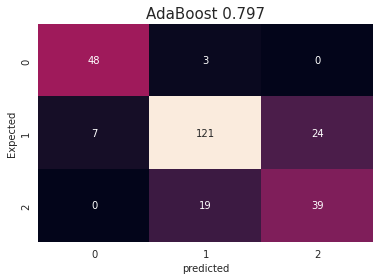

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.85      0.80      0.82       152
           2       0.62      0.67      0.64        58

    accuracy                           0.80       261
   macro avg       0.78      0.80      0.79       261
weighted avg       0.80      0.80      0.80       261


Summary:
Recall/Sensitivity: 0.796053
Specificity: 0.941176
Precision: 0.846154
Balanced Accuracy: 0.803214
F1-score: 0.820339


In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
fit_predict_score('AdaBoost',ada)

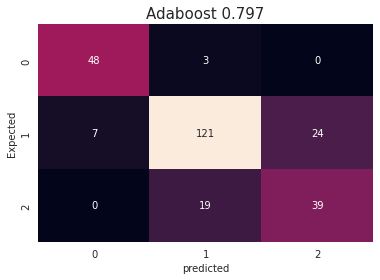

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.85      0.80      0.82       152
           2       0.62      0.67      0.64        58

    accuracy                           0.80       261
   macro avg       0.78      0.80      0.79       261
weighted avg       0.80      0.80      0.80       261


Summary:
Recall/Sensitivity: 0.796053
Specificity: 0.941176
Precision: 0.846154
Balanced Accuracy: 0.803214
F1-score: 0.820339


In [55]:
fit_predict_score('Adaboost',ada)  

In [56]:
print("Adaboost Model Score" , ":" , ada.score(X_train, y_train))
print("Adaboost Cross Validation Score" ,":" , ada.score(X_test, y_test))

Adaboost Model Score : 0.7841634738186463
Adaboost Cross Validation Score : 0.7969348659003831


In [57]:
#Grid Search
params = {'n_estimators': [10, 50, 100, 200, 300, 400],'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'random_state': [42]}

grid_ab = AdaBoostClassifier()
grid = GridSearchCV(estimator=grid_ab, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [58]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [59]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 42}

In [60]:
#For the best model:
aba = AdaBoostClassifier(learning_rate=1.0, n_estimators=10, random_state = 42)
aba.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

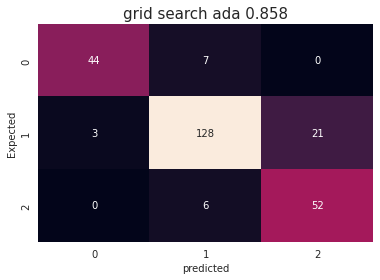

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        51
           1       0.91      0.84      0.87       152
           2       0.71      0.90      0.79        58

    accuracy                           0.86       261
   macro avg       0.85      0.87      0.86       261
weighted avg       0.87      0.86      0.86       261


Summary:
Recall/Sensitivity: 0.842105
Specificity: 0.862745
Precision: 0.907801
Balanced Accuracy: 0.867134
F1-score: 0.873720


In [61]:
fit_predict_score('grid search ada',aba)   

In [62]:
pred_train = aba.predict(X_train)
print("Adaboost Model Score:",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

pred = aba.predict(X_test)
print("Adaboost Cross Validation Score:",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Adaboost Model Score: 0.8607918263090677
Adaboost Cross Validation Score: 0.8582375478927203


- Before find the best model, the Cross Validation Score of Adaboost model is 0.7969348659003831.
- The final Cross Validation Score for the best Adaboost model model is 0.8582375478927203

### Gradient Boost

In [63]:
def fit_predict_score(name, clf):
    # Fit the model
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_test)
    
    confusion_matrix = pd.crosstab(index=np.ravel(y_test), columns=predictions.ravel(), rownames=['Expected'], colnames=['predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predictions),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    dt_met = metrics.classification_report(y_true = y_test, y_pred = predictions,  output_dict=True)
    
    # Create confusion matrix
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test, predictions))
    print("\nSummary:")
    print("Recall/Sensitivity: %f"%(dt_met['1']['recall']))
    print("Specificity: %f"%(dt_met['0']['recall']))
    print("Precision: %f"%(dt_met['1']['precision']))
    print("Balanced Accuracy: %f"%(balanced_accuracy_score(y_test, predictions)))
    print("F1-score: %f"%(dt_met['1']['f1-score']))

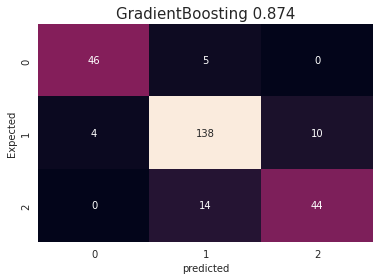

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        51
           1       0.88      0.91      0.89       152
           2       0.81      0.76      0.79        58

    accuracy                           0.87       261
   macro avg       0.87      0.86      0.86       261
weighted avg       0.87      0.87      0.87       261


Summary:
Recall/Sensitivity: 0.907895
Specificity: 0.901961
Precision: 0.878981
Balanced Accuracy: 0.856159
F1-score: 0.893204


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
fit_predict_score('GradientBoosting',gb)

In [65]:
print("Gradient Boost Model Score" , ":" , gb.score(X_train, y_train))
print("Gradient Boost Cross Validation Score" ,":" , gb.score(X_test, y_test))

Gradient Boost Model Score : 0.9948914431673053
Gradient Boost Cross Validation Score : 0.8735632183908046


In [66]:
#grid search
params = {'n_estimators': [10, 50, 100, 200, 300, 400], 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 'random_state': [42]}

grid_gb = GradientBoostingClassifier()
grid = GridSearchCV(estimator=grid_gb, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [68]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 10, 'random_state': 42}

In [69]:
#For the best model:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, random_state =42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, random_state=42)

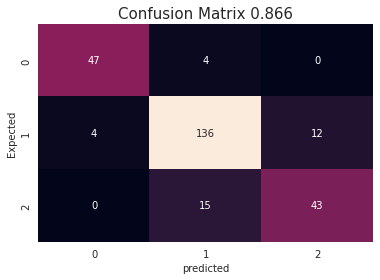

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.88      0.89      0.89       152
           2       0.78      0.74      0.76        58

    accuracy                           0.87       261
   macro avg       0.86      0.85      0.86       261
weighted avg       0.86      0.87      0.87       261


Summary:
Recall/Sensitivity: 0.894737
Specificity: 0.921569
Precision: 0.877419
Balanced Accuracy: 0.852562
F1-score: 0.885993


In [70]:
fit_predict_score('Confusion Matrix',gb) 

In [71]:
print("Gradient Boost Model Score" , ":" , gb.score(X_train, y_train))
print("Gradient Boost Cross Validation Score" ,":" , gb.score(X_test, y_test))

Gradient Boost Model Score : 0.9591315453384419
Gradient Boost Cross Validation Score : 0.8659003831417624


- Before find the best model, the Cross Validation Score of Gradient Boost is 0.8735632183908046.
- The final Cross Validation Score for the best Gradient Boost model is 0.8659003831417624.
- Therefore, we will choose the Gradient Boost model with defult seting which with 0.874 as reference parameter.

### Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)
# Fit the model
clf.fit(X_train, y_train)
# Make predictions
predictionsClf=clf.predict(X_test)
# Create confusion matrix
confusion_matrix(y_test, predictionsClf)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictionsClf))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.88      0.91      0.90       152
           2       0.83      0.78      0.80        58

    accuracy                           0.88       261
   macro avg       0.88      0.86      0.87       261
weighted avg       0.88      0.88      0.88       261



In [73]:
print("Logistic Regression Model Score" , ":" , clf.score(X_train, y_train))
print("Logistic Regression Cross Validation Score" ,":" , clf.score(X_test, y_test))

Logistic Regression Model Score : 0.8991060025542784
Logistic Regression Cross Validation Score : 0.8773946360153256


### Support Vector

In [74]:
from sklearn.svm import SVR
SVR_reg = SVR(kernel='rbf')
SVR_reg.fit(X_train, y_train)

SVR()

In [75]:
pred_train = SVR_reg.predict(X_train)
pred_val = SVR_reg.predict(X_test)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_test, pred_val)
print("Support Vector Model Score: ", r2_train )
print("Support Vector Cross Validation Score: ",r2_val)

Support Vector Model Score:  0.7554172108565674
Support Vector Cross Validation Score:  0.749194595088962


In [76]:
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_test, pred_val))

print("RMSE on training data: ", rmse_train)
print("RMSE on validation data: ",rmse_val)

RMSE on training data:  0.31839444409166434
RMSE on validation data:  0.3233606047458422


In [77]:
#find the best model
rbfsvr = GridSearchCV(SVR(kernel='rbf'), param_grid={"C": [1, 10, 100, 1000], "gamma": [0.001, 0.01, 0.1, 1]}, scoring='r2')
rbfsvr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [78]:
rbfsvr.best_params_

{'C': 1, 'gamma': 0.001}

In [79]:
rbfsvr.best_score_

0.7083135976189152

In [80]:
pred_train = rbfsvr.predict(X_train)
pred_val = rbfsvr.predict(X_test)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_test, pred_val)
print("Support Vector Model Score: ", r2_train )
print("Support Vector Cross Validation Score: ",r2_val)

Support Vector Model Score:  0.7459101183957277
Support Vector Cross Validation Score:  0.7474367849596419


- Before find the best model, the Cross Validation Score of Support Vector is 0.749194595088962.
- The final Cross Validation Score for the best Support Vector model is 0.7474367849596419.
- Therefore, we will choose the Support Vector model with defult seting which with 0.75 as the final reference parameter for Support Vector model.

### Stochastic Gradient Descent

In [81]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train))
print("Stochastic Gradient Descent Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.8505747126436781
Stochastic Gradient Descent Cross Validation Score : 0.8084291187739464


## Final chose model

#### Best cross validation scores for each model shown above:
- Decisioin Tree Model Score : 0.8735632183908046
- Decisioin Tree Cross Validation Score : 0.8812260536398467
 
- Random Forest Model Score : 0.9489144316730523
- Random Forest Cross Validation Score : 0.8735632183908046
 
- Adaboost Model Score: 0.8607918263090677
- Adaboost Cross Validation Score: 0.8582375478927203
 
- Gradient Boost Model Score : 0.9948914431673053
- Gradient Boost Cross Validation Score : 0.8735632183908046
 
- Gradient Boost Model Score : 0.9591315453384419
- Gradient Boost Cross Validation Score : 0.8659003831417624
 
- Logistic Regression Model Score : 0.8991060025542784
- Logistic Regression Cross Validation Score : 0.8773946360153256
 
- Support Vector Model Score:  0.7459101183957277
- Support Vector Cross Validation Score:  0.7474367849596419
 
- Stochastic Gradient Descent Model Score : 0.8505747126436781
- Stochastic Gradient Descent Cross Validation Score : 0.8084291187739464

#### Final result:
- Based on all the cross-validation scores shown above, we can see that using decision tree model with the best parameters can get the best model for this dataset. For the further improvement, more data would be much better for the validation.

